In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Task-1

<Axes: ylabel='Count'>

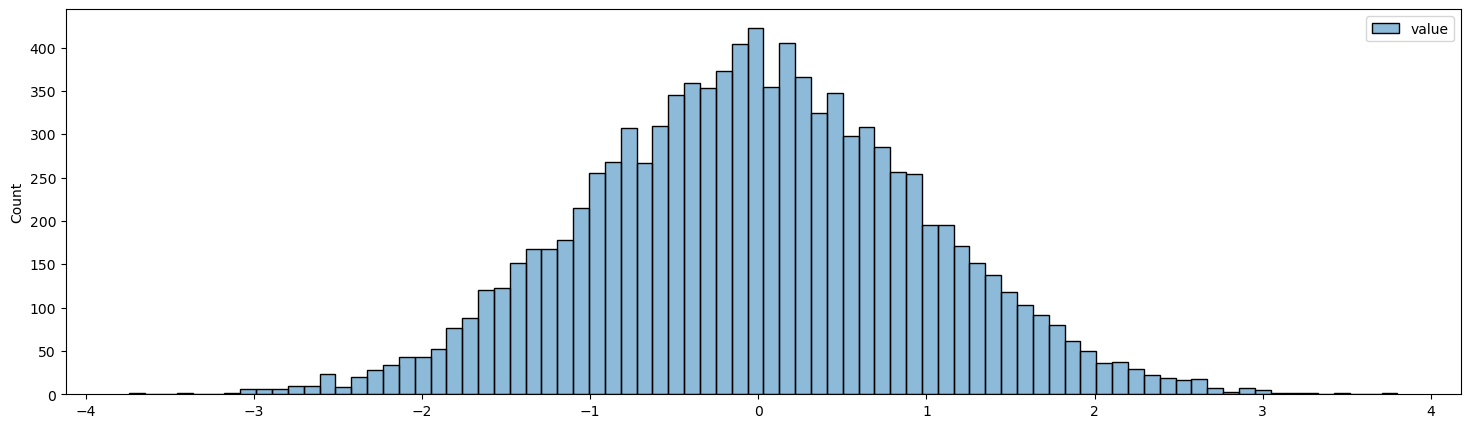

In [11]:
# Generate Normal Distribution
np.random.seed(0) # Initialize the random distibution generator
normal_dist = np.random.randn(10000)
normal_df = pd.DataFrame({'value' : normal_dist})
# Normal Distribution as a Bell Curve
plt.figure(figsize=(18,5))
sns.histplot(normal_df, bins= 80) # More the number of bins, more would be the accuracy

In [35]:
standard_deviation = normal_df['value'].std()
print(standard_deviation)

0.9876059497081746


In [37]:
first_moment = normal_df['value'].mean()
print(first_moment)

-0.018433720158265818


In [39]:
second_moment = normal_df['value'].var()
print(second_moment)

0.9753655118989856


In [40]:
third_moment_1 = normal_df['value'].skew()
print(third_moment_1)
third_moment_2 = stats.skew(normal_df['value'])
print(third_moment_2)
#The difference in values of both functions is dude to bias correction applied in stats.skew(dataframe)

0.026638612696803083
0.026634616738395577


In [32]:
fourth_moment_1 = normal_df['value'].kurtosis()
print(fourth_moment_1)
fourth_moment_2 = stats.kurtosis(normal_df['value'])
print(fourth_moment_2)

-0.030369753700771884
-0.03095451095565238


## Task-2

In [49]:
df = pd.read_csv('stats_dataset.csv')
age_income = df[['Age', 'Income']]
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [46]:
covariance = age_income.cov()
print("Covariance between 'Age' and 'Income':\n", covariance)

Covariance between 'Age' and 'Income':
                Age        Income
Age     133.922426 -3.811863e+02
Income -381.186341  6.244752e+08


In [45]:
correlation = age_income.corr(method='pearson')
print("Correlation between 'Age' and 'Income':\n", correlation)

Correlation between 'Age' and 'Income':
              Age    Income
Age     1.000000 -0.001318
Income -0.001318  1.000000


## Task-3

In [56]:
sample_mean = 64.408
sample_std = 2.05
sample_size = 31
confidence_level = 0.95

alpha = 1 - confidence_level
z_critical = stats.norm.ppf(1-alpha / 2)

margin_of_error = z_critical * (sample_std / np.sqrt(sample_size))

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("Area of both tails for the corresponding x value for left tail area and upper area: ", z_critical)
print("Margin of Error: ", margin_of_error)
print("Confidence Interval: ", (lower_bound, upper_bound))

Area of both tails for the corresponding x value for left tail area and upper area:  1.959963984540054
Margin of Error:  0.721640842980081
Confidence Interval:  (63.68635915701992, 65.12964084298008)


## Task-4

## One-tailed test

In [93]:
population_mean = 18
sample_mean = 16
population_std = 1.5
sample_size = 40
alpha = 0.05

z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

p_value = stats.norm.cdf(z_score)

print("P-value:",p_value," Z-score:",z_score)

if p_value < alpha:
    print("Experimental drug reduces the mean recovery time having a positive impact")
else:
    print("Experimental drug has no effect")

P-value: 1.6883155939436834e-17  Z-score: -8.432740427115679
Experimental drug reduces the mean recovery time having a positive impact


## Two-tailed test

In [89]:
p_value_two_tailed = 2 * (1 - stats.norm.cdf(abs(z_score)))

print("P-value: ",p_value_two_tailed," Z-score: ",z_score)

if p_value < alpha:
    print("Experimental drug reduces the mean recovery time having a positive impact")
else:
    print("Experimental drug has no effect")

P-value:  0.0  Z-score:  -8.432740427115679
Experimental drug reduces the mean recovery time having a positive impact
